<a href="https://colab.research.google.com/github/yubars/ML-and-Cybersecurity-projects/blob/main/Image_classification_using_CNN_Cat_and_Dog_Yuba.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Classification with Cat and Dog


## Convolutional Neural Network - Cat-Dog Classifier


##Import packages

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.preprocessing.image import ImageDataGenerator
from PIL import Image
from keras.preprocessing import image

### Prepare Dataset
Download cat and dog dataset from kaggdle using kaggle id
First install kaggle and download dataset from kaggle and Unzip images

In [ ]:
!gdown --id 1Qzho1EurBSUMSpnAFD9sym1K2BPCziKS
!pip install kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!rm kaggle.json
!mkdir Images
%cd Images
!kaggle datasets download tongpython/cat-and-dog
!unzip cat-and-dog.zip

Augment data using ImageDataGenerator with widh/heigh shift, rotation etc.

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   rotation_range=40,
                                   fill_mode='nearest',
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

Load training images using flow_from_directory with target size of 64 x 64 and batch size of 32

In [ ]:
training_set = train_datagen.flow_from_directory(
                    '/content/Images/training_set/training_set', target_size=(64, 64), batch_size=32, class_mode='binary')

Found 8005 images belonging to 2 classes.


Load test images using flow_from_directory with target size of 64 x 64 and batch size of 32

In [ ]:
test_set = test_datagen.flow_from_directory(
                  '/content/Images/test_set/test_set', target_size=(64, 64), batch_size=32, class_mode='binary')

Found 2023 images belonging to 2 classes.


In [ ]:
#s = training_set.class_indices
#print(s)

Build CNN model with activation functions relu followed by sigmoid and combile model with adam optimizer and binary_crossentropy as loss and accuracy as metric

In [ ]:
model_catdog = Sequential()
model_catdog.add(Convolution2D(64, (3, 3), input_shape = (64,64,3),padding = 'same',activation = 'relu'))
model_catdog.add(MaxPooling2D(pool_size=(2,2), padding = 'same'))
model_catdog.add(Convolution2D(128, (3, 3),padding = 'same', activation = 'relu'))
model_catdog.add(MaxPooling2D(pool_size=(2,2), padding = 'same'))
model_catdog.add(Convolution2D(256, (3, 3),padding = 'same', activation = 'relu'))
model_catdog.add(MaxPooling2D(pool_size=(2,2), padding = 'same'))
model_catdog.add(Flatten())
model_catdog.add(Dense(units = 1024, activation = 'relu'))
model_catdog.add(Dense(units = 512, activation = 'relu'))
model_catdog.add(Dense(units = 1, activation = 'sigmoid'))
model_catdog.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
#Train the model
model_catdog.fit(x = training_set, validation_data=test_set, epochs=15)

Epoch 1/15
251/251 [==============================] - 44s 166ms/step - loss: 0.6979 - accuracy: 0.5014 - val_loss: 0.6925 - val_accuracy: 0.5002
Epoch 2/15
251/251 [==============================] - 42s 168ms/step - loss: 0.6918 - accuracy: 0.5249 - val_loss: 0.6893 - val_accuracy: 0.5319
Epoch 3/15
251/251 [==============================] - 42s 168ms/step - loss: 0.6857 - accuracy: 0.5539 - val_loss: 0.6804 - val_accuracy: 0.5991
Epoch 4/15
251/251 [==============================] - 42s 168ms/step - loss: 0.6864 - accuracy: 0.5389 - val_loss: 0.6748 - val_accuracy: 0.5729
Epoch 5/15
251/251 [==============================] - 42s 169ms/step - loss: 0.6782 - accuracy: 0.5744 - val_loss: 0.7060 - val_accuracy: 0.5729
Epoch 6/15
251/251 [==============================] - 43s 170ms/step - loss: 0.6612 - accuracy: 0.6069 - val_loss: 0.6266 - val_accuracy: 0.6342
Epoch 7/15
251/251 [==============================] - 42s 168ms/step - loss: 0.6332 - accuracy: 0.6408 - val_loss: 0.6124 - val_ac

Download test examples

In [ ]:
!mkdir test_examples
%cd test_examples
!gdown --id 1aTlxDZgQyhJJPvvB3O8ZWMjij_JetqFK
!unzip test_examples.zip
!rm -rf test_examples.zip

/content/Images/test_examples
Downloading...
From: https://drive.google.com/uc?id=1aTlxDZgQyhJJPvvB3O8ZWMjij_JetqFK
To: /content/Images/test_examples/test_examples.zip
100% 1.29M/1.29M [00:00<00:00, 85.9MB/s]
Archive:  test_examples.zip
  inflating: dog2.jpg                
  inflating: cat1.jpg                
  inflating: cat2.jpg                
  inflating: dog1.jpg                


In [ ]:
categories = {0: "cat", 1: "dog"}

In [ ]:
def read_and_show(path):
  img = Image.open(path)
  img = img.resize((64,64))
  plt.imshow(img)
  return img

Define function to predict image inside test examples

In [ ]:
def predict_class(img):
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis=0)
  pred = model_catdog.predict(img)
  print(f"The predicted category is: {categories[int(pred[0,0])]}")

predict Dog example

The predicted category is: cat


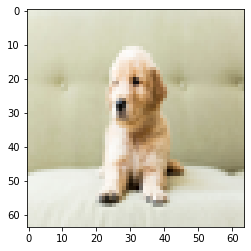

In [ ]:
img = read_and_show("/content/Data/test_examples/dog2.jpg")
predict_class(img)

predict cat example

The predicted category is: dog


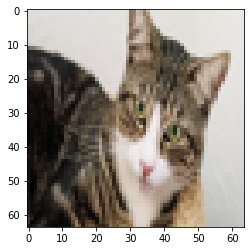

In [ ]:
img = read_and_show("/content/Data/test_examples/cat2.jpg")
predict_class(img)

Colab link

In [ ]:
Colab Link: https://colab.research.google.com/drive/1PfkmO29Tg9_THHOejH-U9S6J4GoNJGqG?usp=sharing
